In [1]:
import sys
sys.path.append('../../public-Git/')
sys.path.append('../../public-Git/demo_Intraday/')

from factor_function import *
from utils.stg_functions_local import *

%matplotlib inline

In [2]:
class mom_rev(Factor):
    name = 'mom_rev'
    islimitbuy = True
    islimitsell = True
    # 依赖的基础因子名称，包含 'datetime', 'date', 'time', 'issue', 'open', 'high', 'low', 'close',
    #                           'volume', 'value', 'num_trades', 'vwap1', 'vwap2', 'preclose', 'adj',
    #                           'is_limit_buy', 'is_limit_sell', 'filterFlag'字段
    dependencies = ['close', 'preclose']

    def calc(self, data):
        # 准备所需字段
        close = data['close'].replace([0], np.nan)
        # preclose = data['preclose'].replace([0], np.nan)
        preclose = data['close'].shift(1).fillna(data['preclose']).replace([0], np.nan)
        ret = close/preclose - 1
        # 对于frequency='30m'和frequency='60m',可用数据截止到1453,对于后面的行删除
        factor_time = (close.index.hour*100+close.index.minute) < 1458

        ret = ret.loc[factor_time, :]
        factor_rev = -(ret.sub(ret.mean(axis=1, skipna=True), axis=0).div((ret.max(axis=1, skipna=True)-ret.min(axis=1, skipna=True)).replace(0, np.nan), axis=0))
        factor_rev = factor_rev.rolling(20).sum()
        return factor_rev.replace([-np.inf, np.inf], np.nan)
        # factor_rev_decay = factor_rev * 0
        # for i in range(5):
        #     weight = 1 - 0.2 * i
        #     factor_rev_decay += factor_rev.shift(i, fill_value=0) * weight
        # return factor_rev_decay.replace([-np.inf, np.inf], np.nan)

In [3]:
class factor_m(Factor):
    name = 'factor_m'
    islimitbuy = True
    islimitsell = True
    dependencies = []

    def calc(self, data):
        label = '1316'
        factor = feather.read_dataframe(f'../data/factor_m_60m/factor_m_{label}_60m.feather')
        factor = factor.pivot(index='datetime', columns='issue', values='m')
        return factor

In [4]:
label = 'tr'

class umr_rev(Factor):
    name = 'umr_rev'
    islimitbuy = True
    islimitsell = True
    dependencies = []
    def calc(self, data):
        factor = feather.read_dataframe(f'../data/factor_rev_60m/{label}_rev_60m.feather')
        factor = factor.pivot(index='datetime', columns='issue', values='rev')
        return factor

class umr_only_rev(Factor):
    name = 'umr_rev'
    islimitbuy = True
    islimitsell = True
    dependencies = []
    def calc(self, data):
        factor = feather.read_dataframe(f'../data/factor_rev_60m/{label}_only_rev_60m.feather')
        factor = factor.pivot(index='datetime', columns='issue', values='rev')
        return factor

开始计算umr_rev
因子数据计算完成，耗时0:00:02.130944
********************************************************************************************************************************************************************************************************

********************************************************************************************************************************************************************************************************
umr_rev------输出对标超额收益模式指标
Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 5.0%, not exceeded: OK!
FactorValues Quantiles Statistics


,min,max,mean,std,count,daily_count,count %
factor_quantile,,,,,,,
1,-5.372476e-03,-0.000053,-0.000245,0.000205,722175,597.0,12.50
2,-1.402525e-04,-0.000016,-0.000066,0.000021,721582,596.0,12.49
3,-6.306854e-05,-0.000007,-0.000031,0.000010,721421,596.0,12.49
4,-3.546516e-05,0.000002,-0.000016,0.000006,721731,596.0,12.50
5,-2.055079e-05,0.000010,-0.000007,0.000004,721290,596.0,12.49
6,-1.113558e-05,0.000021,-0.000002,0.000004,721562,596.0,12.49
7,-4.944684e-06,0.000062,0.000005,0.000007,721441,596.0,12.49
8,-3.957694e-07,0.001478,0.000040,0.000060,722022,597.0,12.50


Turnover Analysis


,1D
QuantileTop Mean Turnover,0.252




Benchmark AnalysisMode Returns Analysis 


,factor
Top Return(%),18.67
Bottom Return,-31.98
Top ReturnAE(%),13.76
Top ReturnAE MDD(%),-7.75
Top ReturnAE SPR,0.12




Benchmark AnalysisMode Returns Analysis By Year 


,Top Ret(%),Top RetAE(%),Bottom Ret(%),SPR,MDD(%)
date,,,,,
2023,18.67,13.76,-31.98,1.83,-7.75




Information Analysis


,ret
IC Mean,0.138
IR,0.217
IC Mean SD_20D,0.348
IR SD_20D,0.691
IC Mean SD_60D,0.510
IR SD_60D,1.362




                        factor
Top ReturnAE(%)      13.763061
Top ReturnAE MDD(%)  -7.753828
Top ReturnAE SPR      0.117622
IC_20                 0.348174
IR_20                 0.690754
IC_60                 0.510018
IR_60                 1.361750
Top Mean turnover     0.252223
umr_rev计算完成，耗时0:00:12.987375


<Figure size 640x480 with 0 Axes>

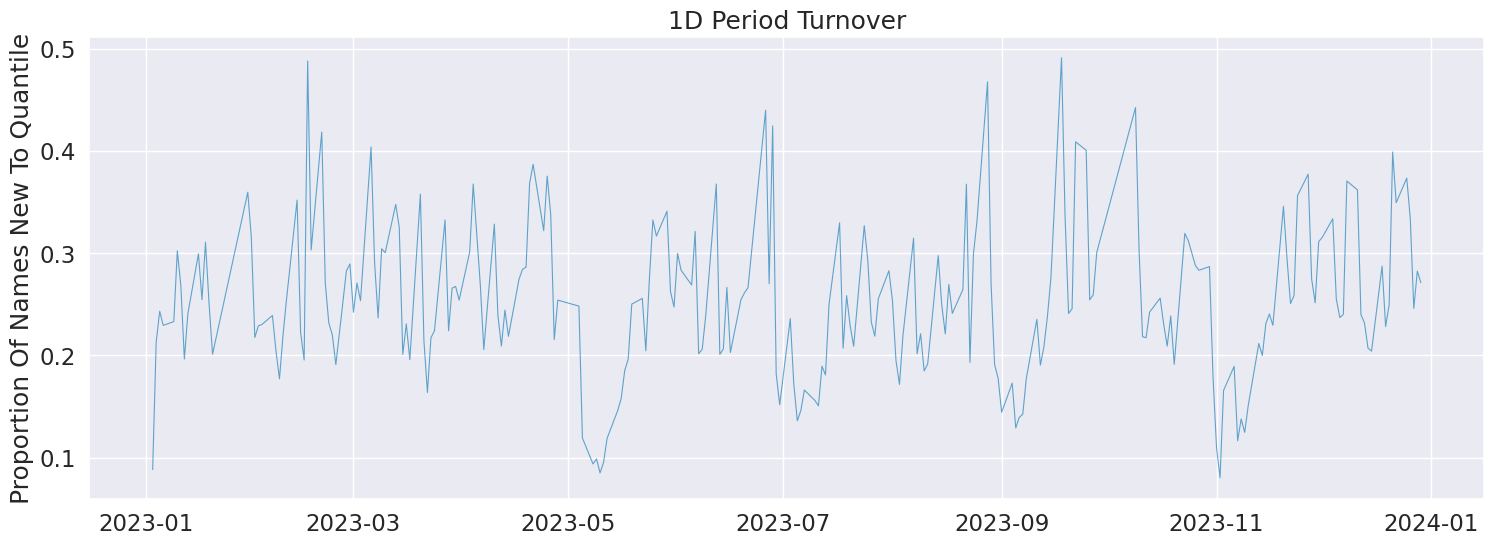

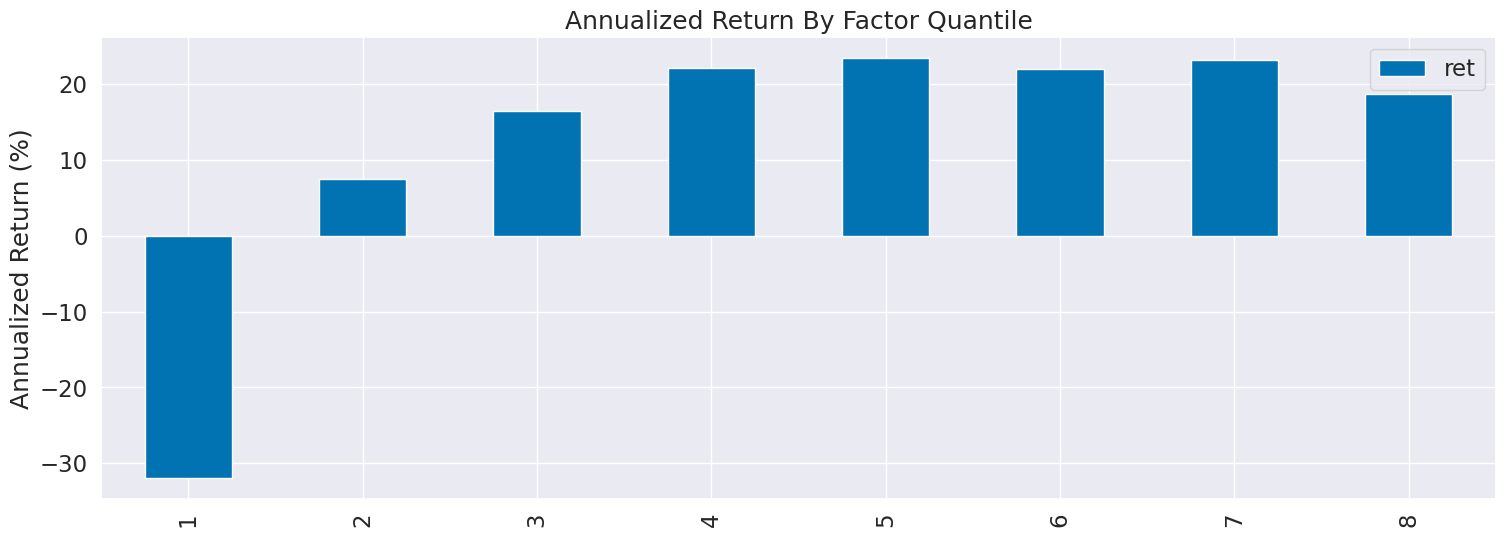

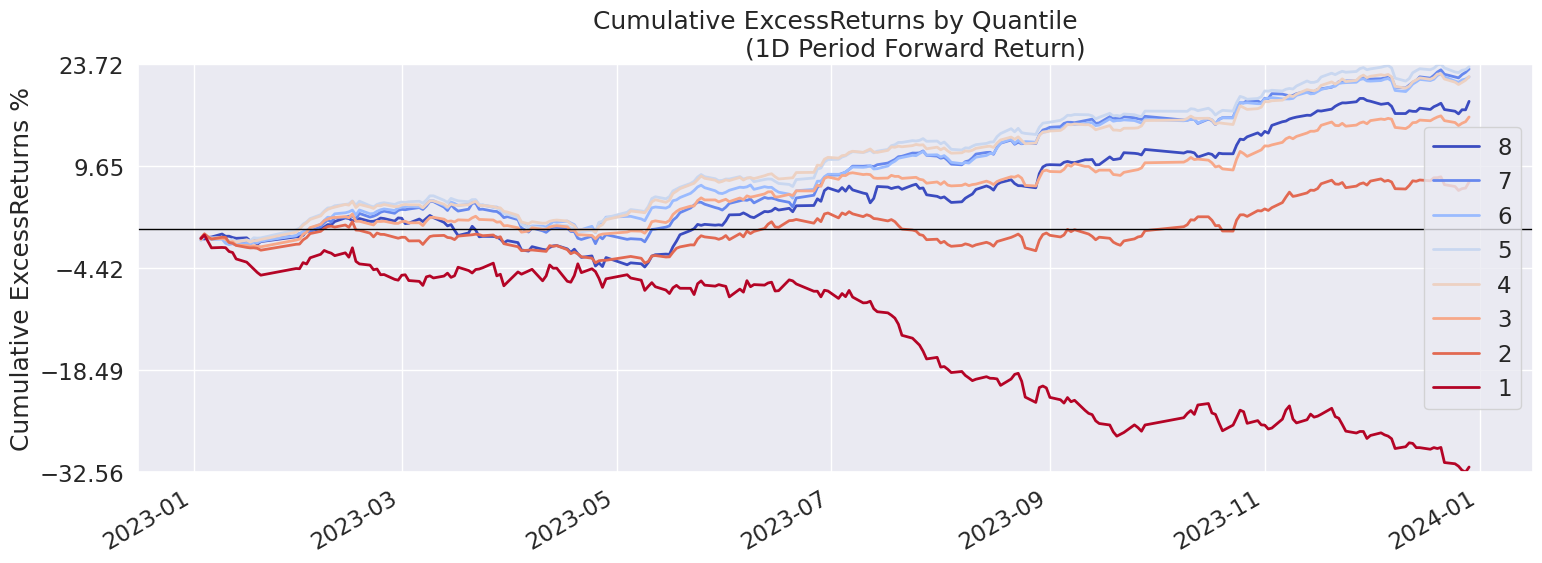

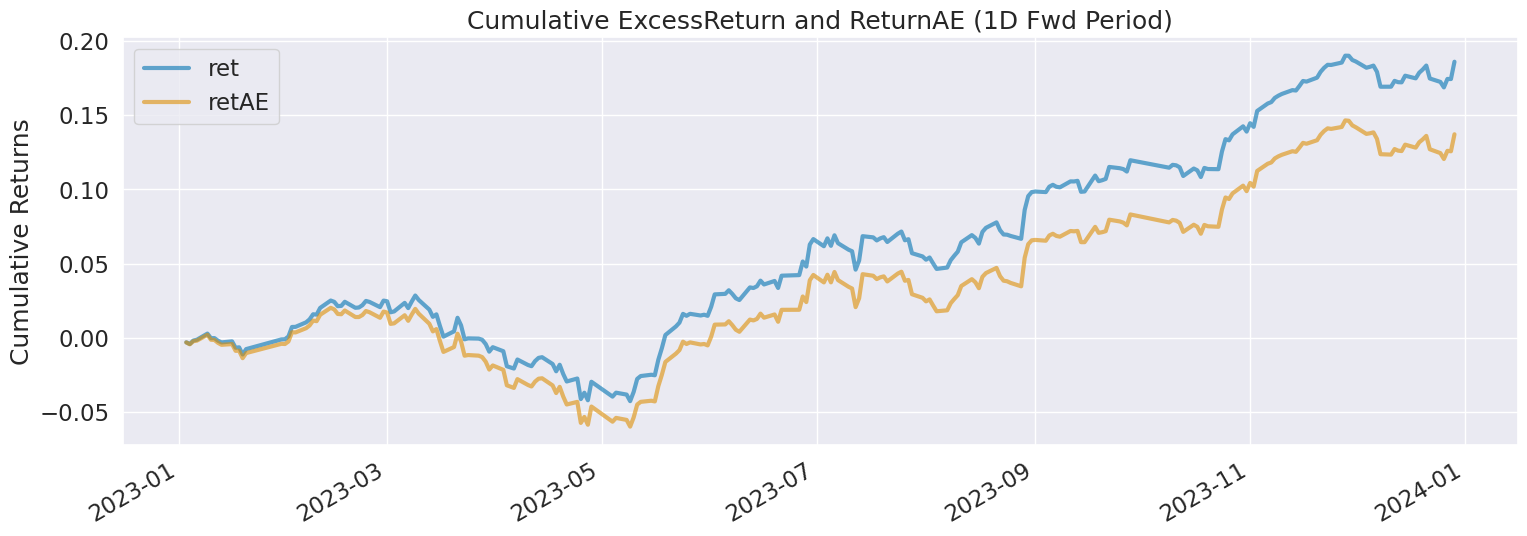

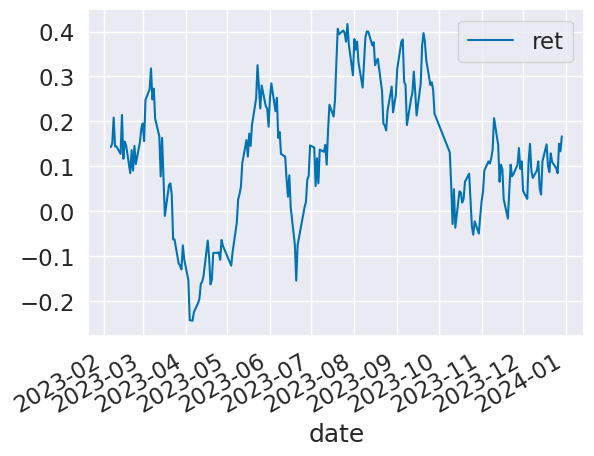

In [5]:
index_code = '000905'

get_base_price(start_date='20230101', end_date='20231231', frequency='60m')

start_datetime = datetime.datetime(2023, 1, 1)
end_datetime = datetime.datetime(2023, 12, 30)
factor = umr_rev()

time_tik = datetime.datetime.now()
print(f"开始计算{factor.name}")
results = analysis(
    start_datetime=start_datetime,
    end_datetime=end_datetime,
    factor=factor,
    benchmark=index_code,
    plot=True,
    quantiles=8
)
print(f"{factor.name}计算完成，耗时{datetime.datetime.now()-time_tik}")

开始计算umr_rev
因子数据计算完成，耗时0:00:01.984268
********************************************************************************************************************************************************************************************************

********************************************************************************************************************************************************************************************************
umr_rev------输出对标超额收益模式指标
Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 5.0%, not exceeded: OK!
FactorValues Quantiles Statistics


,min,max,mean,std,count,daily_count,count %
factor_quantile,,,,,,,
1,-5.373253e-03,-0.000046,-2.355979e-04,0.000202,722175,597.0,12.50
2,-1.306949e-04,-0.000014,-6.102786e-05,0.000020,721582,596.0,12.49
3,-5.890495e-05,-0.000005,-2.810053e-05,0.000010,721421,596.0,12.49
4,-3.240474e-05,0.000002,-1.387897e-05,0.000006,721731,596.0,12.50
5,-1.797852e-05,0.000011,-6.067120e-06,0.000004,721290,596.0,12.49
6,-9.486604e-06,0.000023,-6.789948e-07,0.000004,721562,596.0,12.49
7,-4.138878e-06,0.000066,5.683403e-06,0.000007,721441,596.0,12.49
8,2.518418e-07,0.001472,4.215993e-05,0.000060,722022,597.0,12.50


Turnover Analysis


,1D
QuantileTop Mean Turnover,0.226




Benchmark AnalysisMode Returns Analysis 


,factor
Top Return(%),18.98
Bottom Return,-32.41
Top ReturnAE(%),14.59
Top ReturnAE MDD(%),-7.36
Top ReturnAE SPR,0.12




Benchmark AnalysisMode Returns Analysis By Year 


,Top Ret(%),Top RetAE(%),Bottom Ret(%),SPR,MDD(%)
date,,,,,
2023,18.98,14.59,-32.41,1.88,-7.36




Information Analysis


,ret
IC Mean,0.130
IR,0.209
IC Mean SD_20D,0.361
IR SD_20D,0.755
IC Mean SD_60D,0.571
IR SD_60D,1.717




                        factor
Top ReturnAE(%)      14.592060
Top ReturnAE MDD(%)  -7.355745
Top ReturnAE SPR      0.120762
IC_20                 0.361307
IR_20                 0.755197
IC_60                 0.571038
IR_60                 1.716560
Top Mean turnover     0.225522
umr_rev计算完成，耗时0:00:12.604509


<Figure size 640x480 with 0 Axes>

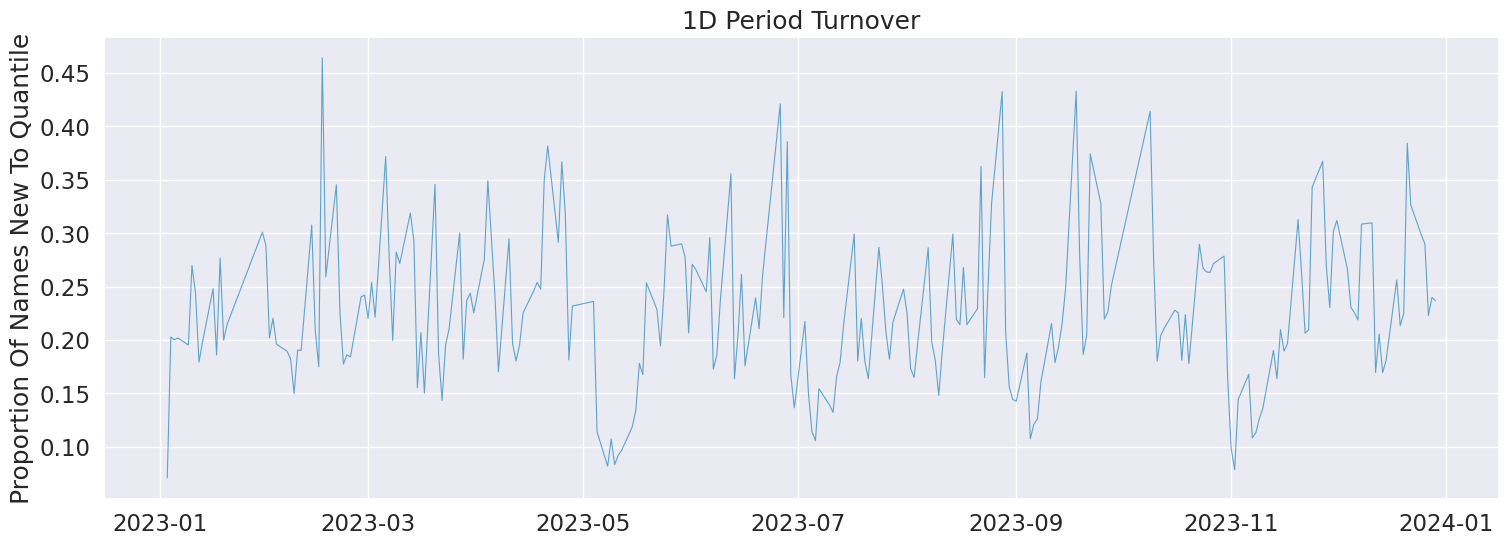

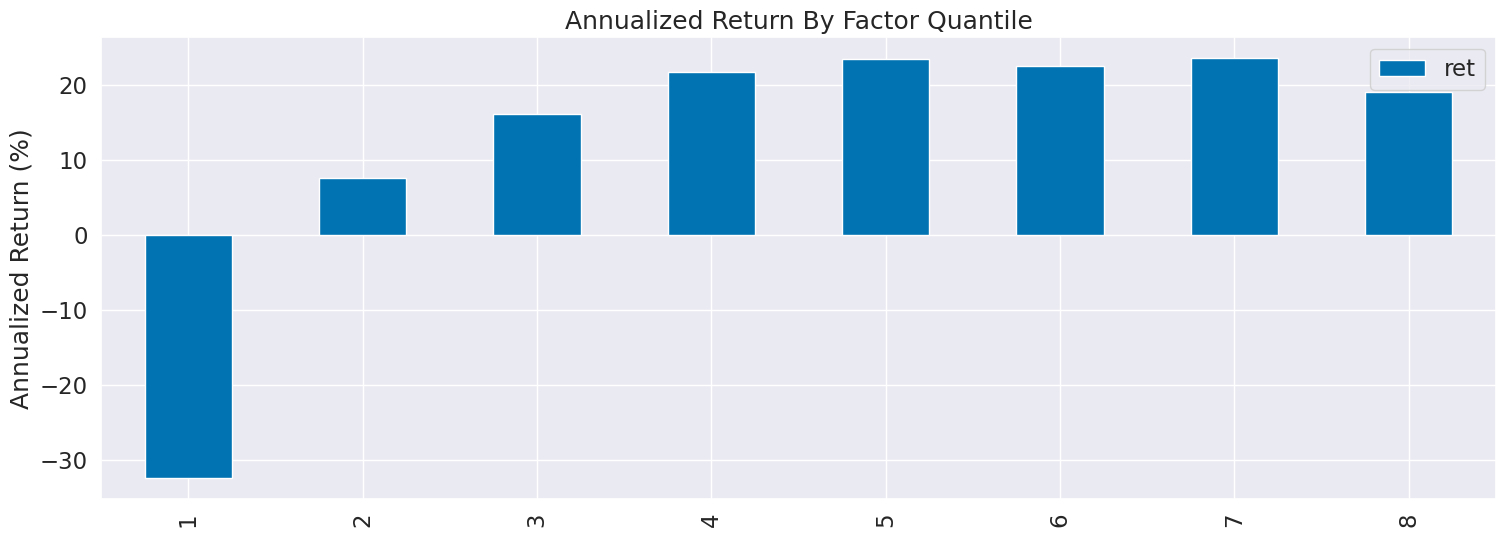

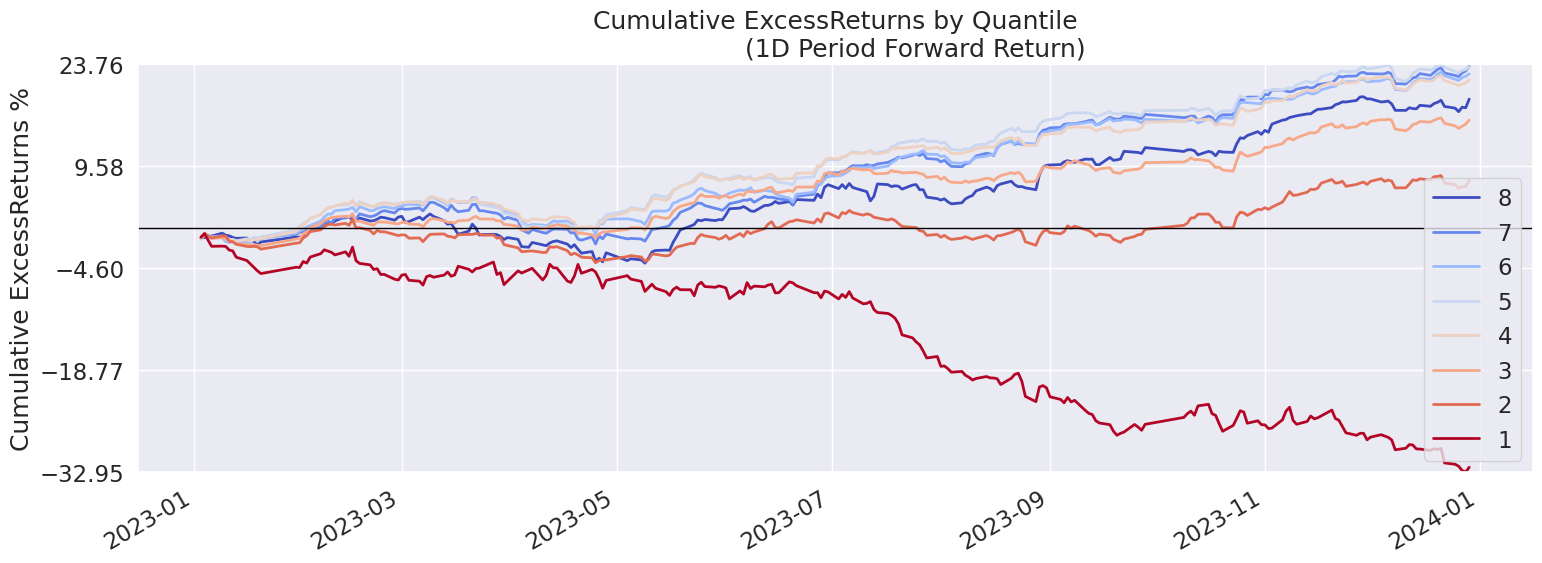

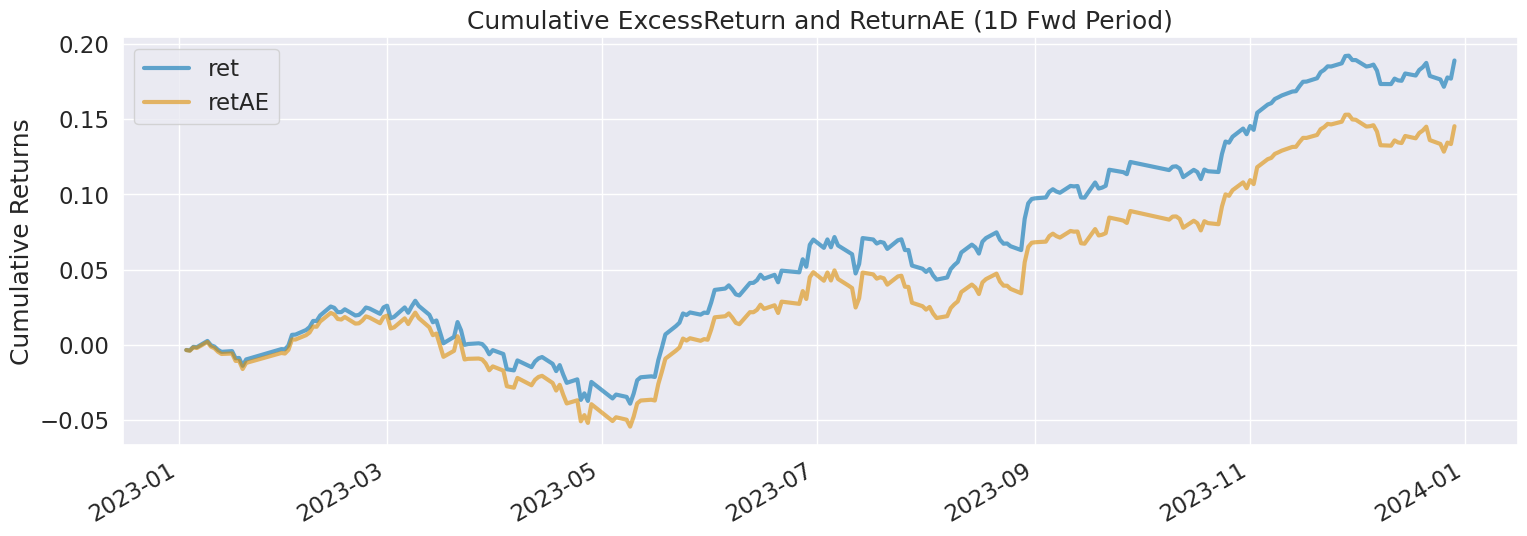

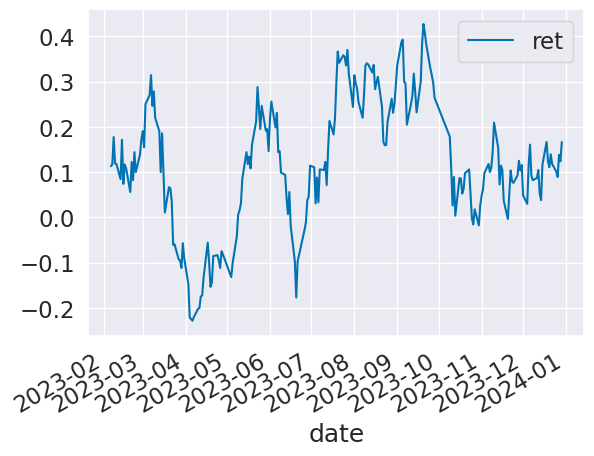

In [6]:
factor = umr_only_rev()
time_tik = datetime.datetime.now()
print(f"开始计算{factor.name}")
results = analysis(
    start_datetime=start_datetime,
    end_datetime=end_datetime,
    factor=factor,
    benchmark=index_code,
    plot=True,
    quantiles=8
)
print(f"{factor.name}计算完成，耗时{datetime.datetime.now()-time_tik}")